## I'm looking forward to your high evaluation!
## If you have any suggestions for improvement, please comment!
### This dataset is about bicycle rentals in Seoul with **2024 rows and 8 columns**.

# Features
|Feature|Example|D-type|Null-Count|
|----|----|----|----|
|Confederation|UEFA|object|0|
|Stadium|Stadiumi Besëlidhja|object|0|
|City|Lezhë|object|0|
|HomeTeams|Besëlidhja|object|0|
|Capacity|7000|int64|0|
|Country|Albania|object|0|
|IOC|ALB|object|0|
|Population|2876591|int64|0|

In [1]:
# Libraries required for visualization and data processing

%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter("ignore")


# to display all columns
pd.set_option("display.max_columns",None)

# Data Loading

In [2]:
df = pd.read_csv("/kaggle/input/football-stadiums/Football Stadiums.csv")
print(df.shape)
df.head(3)

(2024, 8)


,Confederation,Stadium,City,HomeTeams,Capacity,Country,IOC,Population
0,UEFA,Stadiumi Besëlidhja,Lezhë,Besëlidhja,7000,Albania,ALB,2876591
1,UEFA,Stadiumi Flamurtari,Vlorë,Flamurtari Vlorë,8200,Albania,ALB,2876591
2,UEFA,Stadiumi Laçi,Laçi,KF Laçi,5000,Albania,ALB,2876591


# Data details

In [3]:
df.describe()

,Capacity,Population
count,2024.000000,2.024000e+03
mean,22905.075099,9.964931e+07
std,20728.566347,2.326112e+08
min,244.000000,3.219400e+04
25%,7477.750000,1.029103e+07
50%,16408.000000,3.843360e+07
75%,32004.750000,8.081052e+07
max,153000.000000,1.403500e+09


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2024 entries, 0 to 2023
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Confederation  2024 non-null   object
 1   Stadium        2024 non-null   object
 2   City           2024 non-null   object
 3   HomeTeams      2024 non-null   object
 4   Capacity       2024 non-null   int64 
 5   Country        2024 non-null   object
 6   IOC            2024 non-null   object
 7   Population     2024 non-null   int64 
dtypes: int64(2), object(6)
memory usage: 126.6+ KB


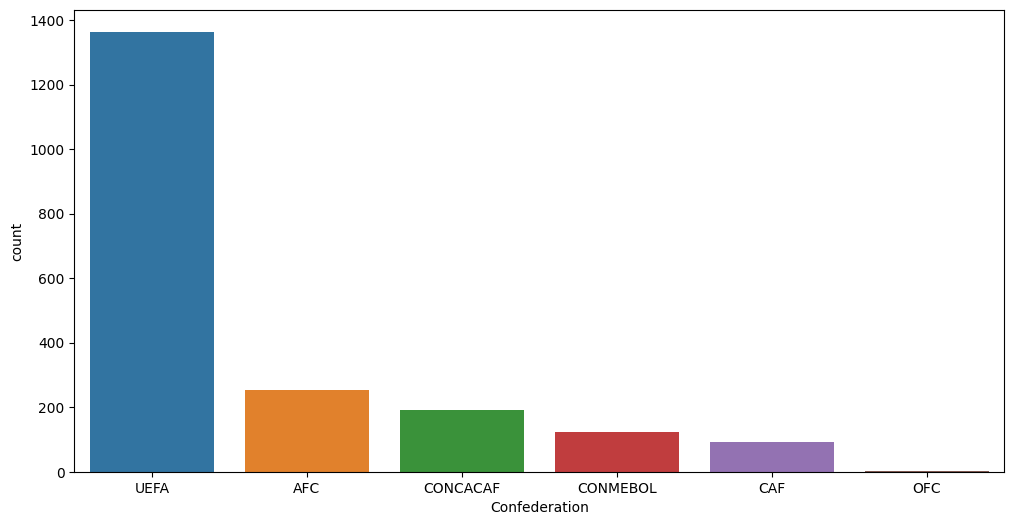

In [9]:
plt.figure(figsize=(12,6))
tmp_df = df["Confederation"].value_counts()
sns.barplot(x=tmp_df.index,y=tmp_df)
plt.show()

## Confederation
UEFA: European Football Federation

CAF: Confederation of African Football

CONMEBOL: South American Football Confederation

AFC: Asian Football Confederation

CONCACAF: North, Central American and Caribbean Football Confederation

OFC: Oceania Football Confederation

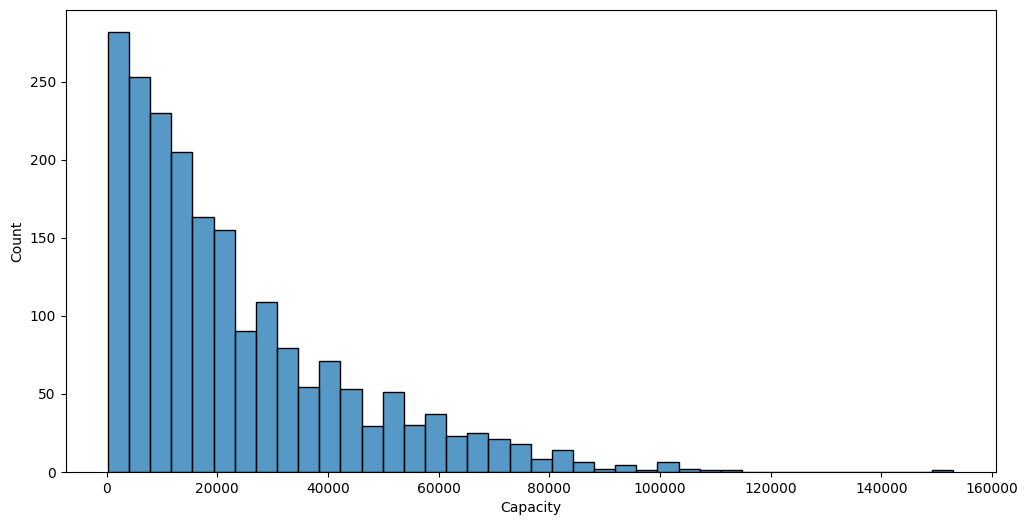

In [15]:
plt.figure(figsize=(12,6))
sns.histplot(df["Capacity"])
plt.show()

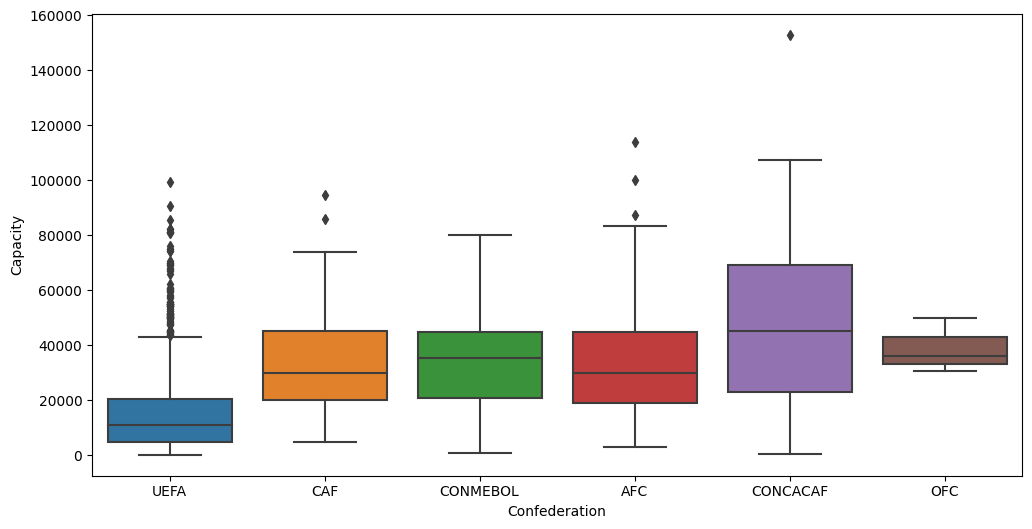

In [16]:
plt.figure(figsize=(12,6))
sns.boxplot(x=df["Confederation"],y=df["Capacity"])
plt.show()

### UEFA has a large number of stadiums, so I think the number of seats is relatively small.

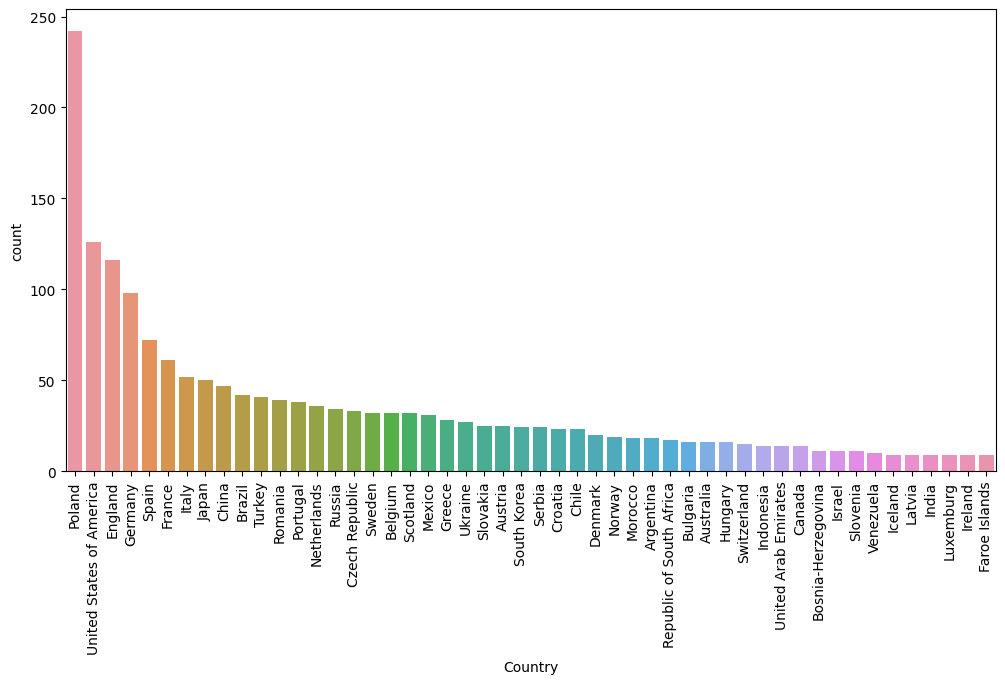

In [20]:
plt.figure(figsize=(12,6))
tmp_df = df["Country"].value_counts()[:50]
plt.xticks(rotation=90)
sns.barplot(x=tmp_df.index,y=tmp_df)
plt.show()

0.31876966306026816


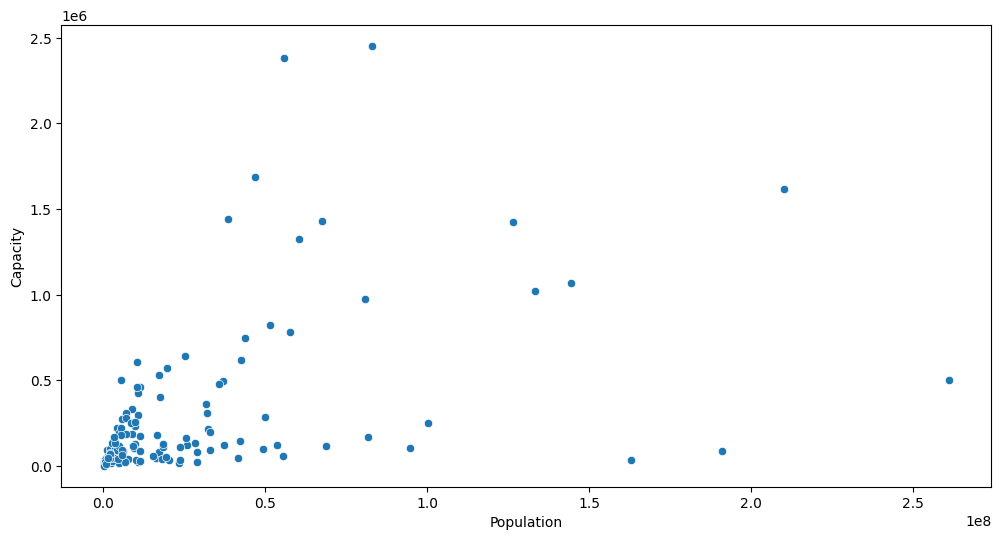

In [27]:
tmp_df = df.groupby("Country").agg({"Population":"mean","Capacity":"sum"})
print(tmp_df["Population"].corr(tmp_df["Capacity"]))
_tmp_df = tmp_df[(tmp_df["Population"]<1e9)&(tmp_df["Capacity"]<4e6)]
plt.figure(figsize=(12,6))
sns.scatterplot(x=_tmp_df["Population"],y=_tmp_df["Capacity"])
plt.show()

### I thought there was a relationship between the population and the total number of stadiums, but it doesn't seem to be related.

# Conclusion

## 1.UEFA has a large number of stadiums, so I think the number of seats is relatively small.
## 2.Population and total number of stadiums are irrelevant.